In [1]:
import random
import string
import math
from icalendar import Calendar
from collections import Counter
from collections import defaultdict
from datetime import datetime, date, time, timezone, timedelta
from zoneinfo import ZoneInfo
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Andmestruktuurid

**Fred Brosman**

*22.02.2026*


## Ülesanne 1 

Kirjutage programm, mis genereerib 50 juhuslikku parooli, mille pikkus on 8-15 tähemärki, ja:

- Tagab paroolide unikaalsuse, kasutades hulkasid.
- Kontrollib, et parool sisaldab tähti, numbreid ja erimärke.
- Rakendage parooli tugevuse kontrollimise algoritm, mis hindab parooli keerukust skaalal 1 kuni 10.
- Kasutage kahte erinevat meetodit tugevuse hindamiseks:
Baastaseme algoritm (4 kriteeriumit),
Edasijõudnute algoritm (entroopia + tähemärkide sagedus).
Baastaseme algoritm (4 kriteeriumi järgi)
See meetod hindab parooli nelja põhikriteeriumi alusel:

Pikkus: Kas paroolil on vähemalt 8 tähemärki?
Tähed: Kas on vähemalt üks suur- ja üks väiketäht?
Numbrid: Kas paroolis on vähemalt üks number?
Eri sümbolid: Kas on vähemalt üks erisümbol ( !@#$%^&*() )?
Kuidas antakse punkte:

Parooli pikkus
Kui pikkus on vähemalt 8 märki → +2 punkti
Kui pikkus on vähemalt 12 märki → +3 punkti
Suur- ja väiketähed
Kui paroolis on nii suured kui ka väikesed tähed → +2 punkti
Numbrid
Kui parool sisaldab vähemalt ühte numbrit → +2 punkti
Erimärgid (!@#$%^&*()_+ jne.)
Kui parool sisaldab vähemalt ühte erimärki → +3 punkti

Parool võib saada maksimaalselt 10 punkti.



Edasijõudnute algoritm (entroopia + tähemärkide sagedus)
Entroopia (Shannoni entroopia) mõõdab parooli juhuslikkust. Mida kõrgem on entroopia, seda raskem on parooli ära arvata.

Valem entroopia arvutamiseks:

H
=
L
×
log
⁡
2
(
N
)
Kus:

L — parooli pikkus (tähemärkide arv paroolis).
N — unikaalsete sümbolite arv (mitu erinevat tähemärki esineb paroolis).
log₂(N) — logaritm alusega 2.

Kuidas teisendada entroopia turvalisuse skooriks?


## 1.1 Paroolide genereerimine

In [2]:
def generate_password(min_length=8, max_length=15):
    characters = string.ascii_letters + string.digits + string.punctuation
    length = random.randint(min_length, max_length)
    password = ''.join(random.choice(characters) for _ in range(length))
    return password


In [3]:
passwords = set()

while len(passwords) < 50:
    passwords.add(generate_password())

## 1.2 Baastaseme algoritm

In [4]:
def basic_strength(password: str) -> int:
    score = 0
    password_length = len(password)

    has_mixed_case = any(c.islower() for c in password) and any (c.isupper() for c in password)
    has_digit = any(c.isdigit() for c in password)
    has_special = any(not c.isalnum() for c in password)

    if password_length >= 12:
        score+= 3
    elif password_length >= 8:
        score += 2

    if has_mixed_case:
        score += 2

    if has_digit:
        score += 2
    
    if has_special:
        score += 3

    return max(1, min(10, score))

## 1.3 Entroopia valem

In [5]:
def entropy(password: str) -> float:
    unique_chars = len(set(password))

    if unique_chars <= 1:
        return 0
    
    return len(password) * math.log2(unique_chars)

## 1.4 Edasijõudnute algoritm

In [6]:
def advanced_strength(password: str) -> int:

    entropy_value = entropy(password)

    if entropy_value <= 10:
        return 2
    
    elif entropy_value <= 20:
        return 5
    
    elif entropy_value <= 30:
        return 7
    
    elif entropy_value <= 40:
        return 9
    
    else:
        return 10

## 1.5 Programmi käivitamine ja tulemused.

In [18]:
for password in passwords:
    print(f"{password} | Basic: {basic_strength(password)} | Advanced: {advanced_strength(password)}")

oZFA\X86j?s}Xj | Basic: 10 | Advanced: 10
xjrQwka-j'2pnN | Basic: 10 | Advanced: 10
)1St0)`$}t2(ys | Basic: 10 | Advanced: 10
b}H6PX?GQ | Basic: 9 | Advanced: 7
I-s\JG7P | Basic: 9 | Advanced: 7
0-7>b.XZu{D | Basic: 9 | Advanced: 9
4,/zu@SrM4I | Basic: 9 | Advanced: 9
]6c~Z>y?1qt | Basic: 9 | Advanced: 9
irRf5_O^ | Basic: 9 | Advanced: 7
Ie6^r>~z?:\l$d | Basic: 10 | Advanced: 10
gVW5"'f}U^8 | Basic: 9 | Advanced: 9
('(Dxb:*UB | Basic: 7 | Advanced: 9
\f$qZ"Eo | Basic: 7 | Advanced: 7
Jp<K/TLMKpG | Basic: 7 | Advanced: 9
I(k$I5;}F | Basic: 9 | Advanced: 7
uzZ<TY$xpz0{/Yc | Basic: 10 | Advanced: 10
B030.[y37|# | Basic: 9 | Advanced: 9
0[mm=rb_pv | Basic: 7 | Advanced: 9
>I9hK&BB9<B;/lj | Basic: 10 | Advanced: 10
>Xlq.i',k#^uI/w | Basic: 8 | Advanced: 10
Nb@}T#m)3,P | Basic: 9 | Advanced: 9
/!E44d1"| | Basic: 9 | Advanced: 7
9&<nWX/l | Basic: 9 | Advanced: 7
E:KL9#8xCLzS<E | Basic: 10 | Advanced: 10
oE+k+H1-bfQ& | Basic: 10 | Advanced: 10
/\j+q%9nk | Basic: 7 | Advanced: 7
JR>caG"e|Vpt | 

## Ülesanne 2

Kirjutage programm, mis töötleb iCalendar (.ics) faili, mis sisaldab tunniplaani andmeid.
Programm peab:

- Lugema tunniplaani andmed .ics failist.
- Salvestama andmed sobivasse andmestruktuuri.
- Analüüsima ja kuvama tunniplaani statistikat.

*tunniplaan.taltech.ee* saadud .ics fail sisaldab kogu tunniplaani struktureeritud kujul. Seda saab hankida kahel viisil:

Esimene variant: Laadige alla iCalendar formaadis (.ics).

Teine variant: Kopeerige URL ja kasutage seda programmis, et faile automaatselt alla laadida.

Programmil peavad olema järgmised funktsioonid:
- a. mitu kohtumist on igas aines
- b. ainete nimekiri õppejõu järgi
- c. millist kahte ainet õpetatakse lähiajal
- d. *(lisa) graafiline ajakava – kuvage loengud graafilises kalendris (matplotlib)

## 2.1 Kuupäeva ja aja abifunktsioonid

In [8]:
TALLINN_TZ = ZoneInfo("Europe/Tallinn")

def ensure_datetime(value):
    if value is None:
        return None
    if isinstance(value, datetime):
        return value
    if isinstance(value, date):
        return datetime.combine(value, time.min)
    return None



In [9]:
def fmt_tallinn(dt: datetime) -> str:
    return dt.astimezone(TALLINN_TZ).strftime("%d.%m.%Y %H:%M")

## 2.2 Tunniplaanist(kalendrist) andmete kogumine

In [10]:

# Read the iCalendar file
with open('tunniplaan.ics', 'rb') as f:
    cal = Calendar.from_ical(f.read())

# Extract and display events
print("Tunniplaani sündmused:")
print("=" * 80)

events = []
for component in cal.walk():
    if component.name == "VEVENT":
        event_data = {
            'subject': str(component.get('summary', 'N/A')),
            'start': component.get('dtstart').dt if component.get('dtstart') else None,
            'end': component.get('dtend').dt if component.get('dtend') else None,
            'location': str(component.get('location', 'N/A')),
            'description': str(component.get('description', 'N/A'))
        }
        events.append(event_data)
       
        print(f"Aine: {event_data['subject']}")
        print(f"Aeg: {fmt_tallinn(event_data['start'])} kuni {fmt_tallinn(event_data['end'])}")
        print(f"Asukoht: {event_data['location']}")
        print(f"Õppejõud: {event_data['description']}")
        print("-" * 80)

print(f"\nKokku sündmusi: {len(events)}")

Tunniplaani sündmused:
Aine: RAM0620 - Programmeerimine
Aeg: 07.02.2026 10:45 kuni 07.02.2026 12:15
Asukoht: VK1-42
Õppejõud: Õppejõud: Maarika Virkunen
--------------------------------------------------------------------------------
Aine: RAM0620 - Programmeerimine
Aeg: 07.03.2026 14:45 kuni 07.03.2026 16:15
Asukoht: VK1-40
Õppejõud: Õppejõud: Maarika Virkunen
--------------------------------------------------------------------------------
Aine: RAM0620 - Programmeerimine
Aeg: 21.03.2026 09:00 kuni 21.03.2026 12:15
Asukoht: VK1-28
Õppejõud: Õppejõud: Natalja Ivleva
--------------------------------------------------------------------------------
Aine: RAM0620 - Programmeerimine
Aeg: 04.04.2026 13:00 kuni 04.04.2026 16:15
Asukoht: VK1-28
Õppejõud: Õppejõud: Natalja Ivleva
--------------------------------------------------------------------------------
Aine: RAM0620 - Programmeerimine
Aeg: 18.04.2026 13:00 kuni 18.04.2026 16:15
Asukoht: VK1-28
Õppejõud: Õppejõud: Natalja Ivleva
---------

## 2.3 Tunniplaanis olevate ainete kuvamine

In [11]:
subjects = set(event['subject'] for event in events)
print("\nTunniplaanis olevad ained:")
for subject in sorted(subjects):
    print(f"- {subject}")


Tunniplaanis olevad ained:
- EVK0033 - Eesti keel III
- EVR0320 - Rohetehnoloogiate baaskursus 
- NTR0450 - Inseneriinformaatika
- RAE1100 - Rakendusfüüsika
- RAM0620 - Programmeerimine
- RAM0800 - Digitaalloogika ja -süsteemid
- RAM0810 - Operatsioonisüsteemide administreerimine 


## 2.4 Ainete kohtumiste arv

In [12]:
subject_counts = Counter(event['subject'] for event in events)

print("\nKohtumiste arv ainetes:")
for subject, count in subject_counts.most_common():
    print(f"- {subject}: {count}")


Kohtumiste arv ainetes:
- RAM0800 - Digitaalloogika ja -süsteemid: 9
- RAM0620 - Programmeerimine: 8
- RAE1100 - Rakendusfüüsika: 8
- EVK0033 - Eesti keel III: 8
- NTR0450 - Inseneriinformaatika: 7
- EVR0320 - Rohetehnoloogiate baaskursus : 6
- RAM0810 - Operatsioonisüsteemide administreerimine : 5


## 2.5 Ainete kuvamine õppejõu järgi

In [13]:
teacher_to_subjects = defaultdict(set)

for event in events:
    teacher = event["description"].strip()
    subject = event["subject"].strip()
    teacher_to_subjects[teacher].add(subject)

print("\nAined õppejõu järgi:")
for teacher in sorted(teacher_to_subjects):
    subjects = ", ".join(sorted(teacher_to_subjects[teacher]))
    print(f"- {teacher}: {subjects}")


Ained õppejõu järgi:
- Õppejõud: Dmitri Nikitin: EVR0320 - Rohetehnoloogiate baaskursus
- Õppejõud: Maarika Virkunen: RAE1100 - Rakendusfüüsika, RAM0620 - Programmeerimine
- Õppejõud: Monika Jänis: RAM0800 - Digitaalloogika ja -süsteemid
- Õppejõud: Natalja Ivleva: RAM0620 - Programmeerimine
- Õppejõud: Oleg Shvets: RAM0800 - Digitaalloogika ja -süsteemid, RAM0810 - Operatsioonisüsteemide administreerimine
- Õppejõud: Sergei Pavlov: RAE1100 - Rakendusfüüsika
- Õppejõud: Valentina Limonova: EVK0033 - Eesti keel III
- Õppejõud: Valeria Juštšenko: NTR0450 - Inseneriinformaatika
- Õppejõud: Žanna Gratšjova: NTR0450 - Inseneriinformaatika


## 2.6 Kahe lähiajal õpetava aine kuvamine

In [14]:
now = datetime.now(timezone.utc)
upcoming = []
for event in events:
    start_dt = ensure_datetime(event["start"])
    if start_dt is not None and start_dt >= now:
        upcoming.append((start_dt, event["subject"]))

upcoming.sort(key=lambda event: event[0])

next_two_subjects = []
seen_subjects = set()

for start_dt, subject in upcoming:
    if subject not in seen_subjects:
        next_two_subjects.append((start_dt, subject))
        seen_subjects.add(subject)
        if len(next_two_subjects) == 2 :
            break

print("\nKaks lähiajal õpetatavat ainet:")
if not next_two_subjects:
    print("- Ei leitud ühtegi tulevast ainet.")
else:
    for start_dt, subject in next_two_subjects:
        print(f"- {subject} ({fmt_tallinn(start_dt)})")


Kaks lähiajal õpetatavat ainet:
- EVK0033 - Eesti keel III (28.02.2026 13:00)
- RAM0800 - Digitaalloogika ja -süsteemid (07.03.2026 09:00)


## 2.7 Graafiline ajakava loengute kohta 

In [15]:


def subject_code(subject: str):
    return subject.split(" - ")[0]

def plot_timetable(events, days=10):

    now_utc = datetime.now(timezone.utc)
    end_utc = now_utc + timedelta(days=days)

    rows = []

    for event in events:
        start_dt = ensure_datetime(event["start"])
        end_dt = ensure_datetime(event["end"])

        if not start_dt or not end_dt:
            continue

        if start_dt < now_utc or start_dt > end_utc:
            continue

        start_local = start_dt.astimezone(TALLINN_TZ)
        end_local = end_dt.astimezone(TALLINN_TZ)

        rows.append((start_local, end_local, event["subject"]))

        

    if not rows:
        print("No events found.")
        return
    
    lecture_dates = sorted({start.date() for start, _, _ in rows})
    date_to_x = {d: i for i, d in enumerate(lecture_dates)}

    fig, ax = plt.subplots(figsize=(12,6))

    for start_local, end_local, subject in rows:

        x = date_to_x[start_local.date()]

        start_hour = start_local.hour + start_local.minute/60
        end_hour = end_local.hour + end_local.minute/60

        ax.broken_barh(
            [(x-0.3, 0.6)],
            (start_hour, end_hour-start_hour)
        )

        ax.text(
            x,
            (start_hour+end_hour)/2,
            subject_code(subject),
            ha='center',
            va='center',
            fontsize=8
        )

    ax.set_xticks(range(len(lecture_dates)))
    ax.set_xticklabels([d.strftime("%d.%m") for d in lecture_dates], rotation=0)

    ax.set_ylim(8,20)
    ax.set_ylabel("Kellaaeg")
    ax.set_xlabel("Kuupäev")

    ax.set_title("Tunniplaan")

    ax.grid(True, linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

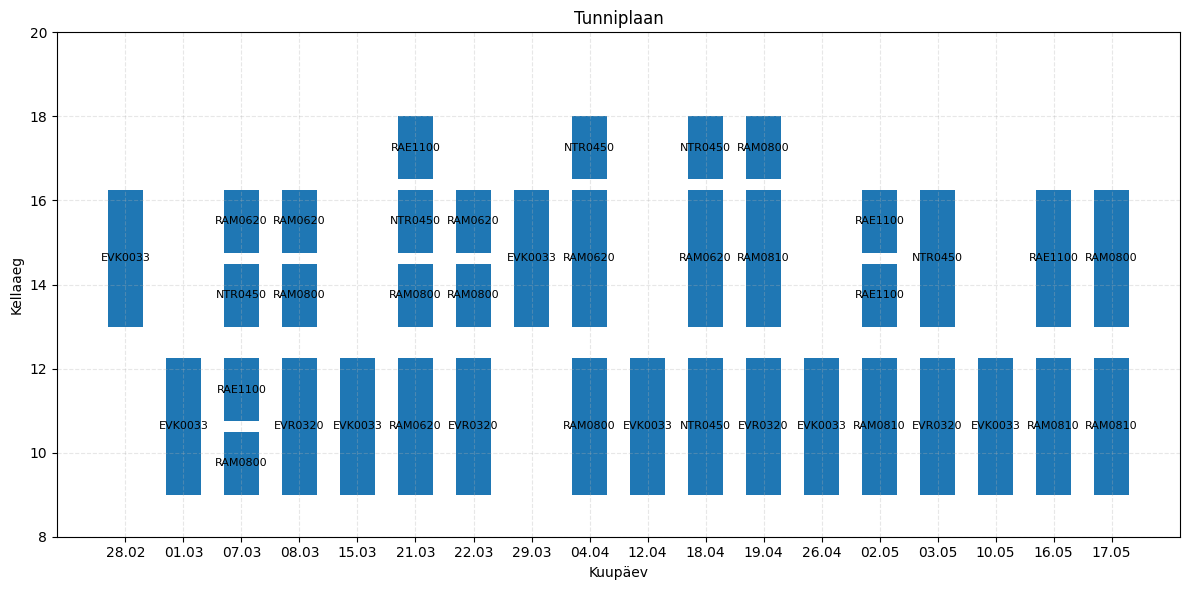

In [16]:
plot_timetable(events, days=90)

#  AI kasutamise vorm



**Üldinfo:**

Nimi: Fred Brosman

Ülesanne: Andmestruktuurid(paroolid ja tunniplaan)

Kuupäev: 23.02.2026

---

**1. Milliseid AI tööriistu kasutasid?**

ChatGPT

---

**2. Too välja 2-3 näidet AI-prompt'idest, mida kasutasid:**

(näiteks: "kirjuta funktsioon, mis...")

a) "Task: Mul on .ics failist saadud datetime väärtused UTC ajas.
Action: Küsi kuidas teisendada datetime väärtused Europe/Tallinn ajavööndisse Pythonis.
Goal: Soovin kuvada tunniplaani ajad kohaliku aja järgi."

b) "Role: Tegutse Python programmeerimise juhendajana.
Task: Selgita kuidas arvutada parooli entroopiat Pythonis valemi H = L × log₂(N) järgi.
Format: Näita näidet Python funktsioonist koos lühikese selgitusega."

c) "Context: Töötlen Pythonis tunniplaani .ics failist ja soovin visualiseerida sündmused matplotlibiga.
Action: Küsi abi kuidas teha graafik, kus kuupäevad on x-teljel ja kellaaeg y-teljel.
Result: Soovin saada loetava tunniplaani graafiku.
Example: Events list sisaldab andmeid kujul (start_datetime, end_datetime, subject)"

---

**3. Millised koodiosad kirjutasid täielikult ise?**

(funktsioonide nimed, failid või konkreetsed read)

- paroolide genereerimise funktsiooni generate_password()

- paroolide tugevuse hindamise funktsiooni basic_strength()

- suure osa advanced_strength() funktsioonist

- paroolide unikaalsuse lahenduse set abil

- .ics faili lugemise ja sündmuste salvestamise listi events

- ainete ja sündmuste statistika arvutamise (set, Counter)

- õppejõudude ja ainete seostamise (teacher_to_subjects)

- tulevaste ainete leidmise loogika (upcoming, next_two_subjects)

- suure osa väljundi printimisest ja programmi struktuurist

---

**4. Milliseid AI poolt genereeritud lahendusi pidid parandama või ümber kirjutama?**

(mida muutsid ja miks?)

- muutsin datetime teisenduse funktsiooni lihtsamaks (ensure_datetime)

- ühendasin timezone teisenduse üheks funktsiooniks (fmt_tallinn)

- eemaldasin dubleerivad funktsioonid

- kohandasin matplotlib graafiku koodi, et see oleks loetavam ja näitaks ainult loengupäevi

- muutsin mõningaid muutuja- ja funktsiooninimesid selgemaks

---

**5. Milliste probleemide lahendamisel aitas AI kõige rohkem?**

- datetime ja timezone teisenduste mõistmisel

- matplotlib graafiku loomisel

- Python funktsioonide nagu sorted(), lambda ja Counter selgitamisel


---

**6. Mida õppisid selle ülesande käigus tehniliselt?**

(uued kontseptsioonid, tehnikad, parimad praktikad)

- Kuidas kasutada Counter klassi andmete statistika arvutamiseks

- Kuidas kasutada sorted() funktsiooni andmete järjestamiseks

- Lambda funktsioonide kasutamine sorteerimisel (lambda event: event[0])

- Kuidas töödelda .ics iCalendar faili Pythonis ja eraldada sündmuste andmed

- Kuidas kasutada sõnastikke (dict) ja hulki (set) andmete grupeerimiseks (nt õppejõud → ained)

- Kuidas visualiseerida andmeid matplotlibiga (tunniplaani graafik)

---

**7. Enesehinnang:**

- [ ] **Vibe Coding** – kasutasin AI-d kiireks koodi genereerimiseks, ei muutnud palju
- [ ] **Mixed** – kasutasin AI-d, aga kohandasin ja parandasin koodi
- [x] **Deep Coding** – kasutasin AI-d abivahendina, mõistan täpselt, kuidas kood töötab

---

**8. Lühike põhjendus oma enesehinnangule (2-3 lauset):**

Kasutasin AI-d peamiselt selgituste ja ideede saamiseks, kuid kirjutasin suure osa koodist ise ning kohandasin AI pakutud lahendusi vastavalt ülesande nõuetele. Mõistan programmi loogikat ja oskan selgitada, kuidas kood töötab.
